# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

# A brief description of the project's objective and overview of data
Carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue. 

Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Load data

In [2]:
# Load the data files into different DataFrames

try:
    calls = pd.read_csv('/datasets/megaline_calls.csv')

except FileNotFoundError:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    
try:
    internet = pd.read_csv('/datasets/megaline_internet.csv')

except FileNotFoundError:
    internet = pd.read_csv('/datasets/megaline_internet.csv')

try:
    messages = pd.read_csv('/datasets/megaline_messages.csv')

except FileNotFoundError:
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    
try:
    plans = pd.read_csv('/datasets/megaline_plans.csv')

except FileNotFoundError:
    plans = pd.read_csv('/datasets/megaline_plans.csv')

try:
    users = pd.read_csv('/datasets/megaline_users.csv')

except FileNotFoundError:
    users = pd.read_csv('/datasets/megaline_users.csv') 


## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
#Check for duplicate plans
plans.duplicated().sum()

0

In [5]:
# Print a sample of data for plans
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


All data follows the SDA Project description of the plans. As shown above, there are no missing values. 
Main difference to note, this data frame includes mb values in the per month column instead of gigabytes.

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [6]:
#No obvious isssues, only adding additional factors. 

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [7]:
#Add gigabyte column 
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

That's right. There are 1,024 megabytes in one gigabyte.

In [8]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Users

In [9]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
#Check for duplicate users
users.duplicated().sum()

0

In [11]:
# Print a sample of data for users
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


Misssing churn_date values. Only 34 out of 500 non-null objects. Could change the reg_data and churn_date 
columns in to datetime64[ns]

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [12]:
#Convert to datetime objects
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
print(users.head(10))
users.info()

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

    reg_date      plan churn_date  
0 2018-12-24  ultimate        NaT  
1 2018-08-13      surf        NaT  


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [13]:
#Add a column that calculates the difference between reg_date and following churn date
users['time_until_churn'] = users['churn_date'] - users['reg_date']
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,time_until_churn
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,21 days
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,NaT


## Calls

In [14]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
#Check for duplicate calls
calls.duplicated().sum()

0

In [16]:
# Print a sample of data for calls
calls.head(20)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

#no missing data and correct datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Fix data

[Fix obvious issues with the data given the initial observations.]

In [18]:
#For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. 
calls['duration'] = np.ceil(calls['duration'])
calls.tail(20)

,id,user_id,call_date,duration
137715,1499_184,1499,2018-09-15,0.0
137716,1499_185,1499,2018-12-05,10.0
137717,1499_186,1499,2018-10-08,17.0
137718,1499_187,1499,2018-12-20,11.0
137719,1499_188,1499,2018-09-29,24.0
137720,1499_189,1499,2018-12-27,0.0
137721,1499_190,1499,2018-09-03,8.0
137722,1499_191,1499,2018-12-24,0.0
137723,1499_192,1499,2018-11-27,9.0
137724,1499_193,1499,2018-10-22,8.0


## Messages

In [19]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
#Check for duplicate messages
messages.duplicated().sum()

0

In [21]:
# Print a sample of data for messages
messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [22]:
#change message_date dtype to datetime

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [23]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Internet

In [24]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [25]:
#Check for internet duplicates
internet.duplicated().sum()

0

In [26]:
# Print a sample of data for the internet traffic
internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [27]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Fix data

[Fix obvious issues with the data given the initial observations.]

In [28]:
#group all user id's and add up their corresponding data usage column and store into a new column
internet['total_used'] = internet.groupby('user_id')['mb_used'].transform('sum')
internet.head(20)

,id,user_id,session_date,mb_used,total_used
0,1000_13,1000,2018-12-29,89.86,1901.47
1,1000_204,1000,2018-12-31,0.00,1901.47
2,1000_379,1000,2018-12-28,660.40,1901.47
3,1000_413,1000,2018-12-26,270.99,1901.47
4,1000_442,1000,2018-12-27,880.22,1901.47
5,1001_0,1001,2018-08-24,284.68,80437.94
6,1001_3,1001,2018-12-09,656.04,80437.94
7,1001_4,1001,2018-11-04,16.97,80437.94
8,1001_10,1001,2018-11-27,135.18,80437.94
9,1001_15,1001,2018-12-13,761.92,80437.94


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [29]:
#Convert to gb and round up
internet['gb_cost'] = np.ceil((internet['total_used'] / 1024))
internet.head(5)

,id,user_id,session_date,mb_used,total_used,gb_cost
0,1000_13,1000,2018-12-29,89.86,1901.47,2.0
1,1000_204,1000,2018-12-31,0.00,1901.47,2.0
2,1000_379,1000,2018-12-28,660.40,1901.47,2.0
3,1000_413,1000,2018-12-26,270.99,1901.47,2.0
4,1000_442,1000,2018-12-27,880.22,1901.47,2.0


## Study plan conditions

In [30]:
# Print out the plan conditions and make sure they are clear for you
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [31]:
#Group by user_id, then resample on month 'M' part of col call_date. Size returns the size
#of the monthly group
monthly_calls = calls.groupby('user_id').resample('M', on='call_date').size()
monthly_calls = monthly_calls.reset_index()
# Convert Series to DataFrame and rename the columns
monthly_calls.rename(columns={monthly_calls.columns[2]: 'monthly_calls'}, inplace=True)
monthly_calls.rename(columns={monthly_calls.columns[1]: 'date'}, inplace=True)

monthly_calls

,user_id,date,monthly_calls
0,1000,2018-12-31,16
1,1001,2018-08-31,27
2,1001,2018-09-30,49
3,1001,2018-10-31,65
4,1001,2018-11-30,64
...,...,...,...
2253,1498,2018-12-31,39
2254,1499,2018-09-30,41
2255,1499,2018-10-31,53
2256,1499,2018-11-30,45


In [32]:
# Calculate the amount of minutes spent by each user per month. Save the result.
print(calls.info())

#Same approach as above. However, looking for sum during given duration
num_minutes = calls.groupby('user_id').resample('M', on='call_date')['duration'].sum()
num_minutes = num_minutes.reset_index()
# Convert Series to DataFrame and rename the columns
num_minutes.rename(columns={num_minutes.columns[2]: 'num_minutes'}, inplace=True)
num_minutes.rename(columns={num_minutes.columns[1]: 'date'}, inplace=True)

num_minutes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


,user_id,date,num_minutes
0,1000,2018-12-31,124.0
1,1001,2018-08-31,182.0
2,1001,2018-09-30,315.0
3,1001,2018-10-31,393.0
4,1001,2018-11-30,426.0
...,...,...,...
2253,1498,2018-12-31,339.0
2254,1499,2018-09-30,346.0
2255,1499,2018-10-31,385.0
2256,1499,2018-11-30,308.0


In [33]:
messages.head(20)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [34]:
# Calculate the number of messages sent by each user per month. Save the result.
num_messages = messages.groupby('user_id').resample('M', on='message_date').size()

num_messages = num_messages.reset_index()
# Convert Series to DataFrame and rename the columns
num_messages.rename(columns={num_messages.columns[2]: 'num_messages'}, inplace=True)
num_messages.rename(columns={num_messages.columns[1]: 'date'}, inplace=True)


In [35]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_per_month = internet.groupby('user_id').resample('M', on='session_date')['mb_used'].sum()

internet_per_month = internet_per_month.reset_index()
# Convert Series to DataFrame and rename the columns
internet_per_month.rename(columns={internet_per_month.columns[2]: 'internet_usage'}, inplace=True)
internet_per_month.rename(columns={internet_per_month.columns[1]: 'date'}, inplace=True)
internet_per_month

,user_id,date,internet_usage
0,1000,2018-12-31,1901.47
1,1001,2018-08-31,6919.15
2,1001,2018-09-30,13314.82
3,1001,2018-10-31,22330.49
4,1001,2018-11-30,18504.30
...,...,...,...
2273,1498,2018-12-31,23137.69
2274,1499,2018-09-30,12984.76
2275,1499,2018-10-31,19492.43
2276,1499,2018-11-30,16813.83


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [36]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged = monthly_calls.merge(num_minutes, on=['user_id', 'date'], how='outer')
merged = merged.merge(num_messages, on=['user_id', 'date'], how='outer')
merged = merged.merge(internet_per_month, on=['user_id', 'date'], how='outer')
merged

,user_id,date,monthly_calls,num_minutes,num_messages,internet_usage
0,1000,2018-12-31,16.0,124.0,11.0,1901.47
1,1001,2018-08-31,27.0,182.0,30.0,6919.15
2,1001,2018-09-30,49.0,315.0,44.0,13314.82
3,1001,2018-10-31,65.0,393.0,53.0,22330.49
4,1001,2018-11-30,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,2018-12-31,NaN,NaN,61.0,13039.91
2289,1361,2018-05-31,NaN,NaN,2.0,1519.69
2290,1482,2018-10-31,NaN,NaN,2.0,NaN
2291,1108,2018-12-31,NaN,NaN,NaN,233.17


In [37]:
# Add the plan information
plans = users['user_id']
plans = plans.reset_index()
plans['plan'] = users['plan']
#clean data by dropping both index and column labeled index
plans.drop(['index', plans.columns[0]], axis=1, inplace=True)
plans

merged = merged.merge(plans, on=['user_id'], how='outer')
merged['result'] = 0
merged

,user_id,date,monthly_calls,num_minutes,num_messages,internet_usage,plan,result
0,1000,2018-12-31,16.0,124.0,11.0,1901.47,ultimate,0
1,1001,2018-08-31,27.0,182.0,30.0,6919.15,surf,0
2,1001,2018-09-30,49.0,315.0,44.0,13314.82,surf,0
3,1001,2018-10-31,65.0,393.0,53.0,22330.49,surf,0
4,1001,2018-11-30,64.0,426.0,36.0,18504.30,surf,0
...,...,...,...,...,...,...,...,...
2298,1307,NaT,NaN,NaN,NaN,NaN,surf,0
2299,1319,NaT,NaN,NaN,NaN,NaN,surf,0
2300,1378,NaT,NaN,NaN,NaN,NaN,surf,0
2301,1463,NaT,NaN,NaN,NaN,NaN,ultimate,0


In [38]:
#Need to convert internet_usage to gb value rounded
merged['internet_usage'] = np.ceil(merged['internet_usage'] / 1024)
merged

,user_id,date,monthly_calls,num_minutes,num_messages,internet_usage,plan,result
0,1000,2018-12-31,16.0,124.0,11.0,2.0,ultimate,0
1,1001,2018-08-31,27.0,182.0,30.0,7.0,surf,0
2,1001,2018-09-30,49.0,315.0,44.0,14.0,surf,0
3,1001,2018-10-31,65.0,393.0,53.0,22.0,surf,0
4,1001,2018-11-30,64.0,426.0,36.0,19.0,surf,0
...,...,...,...,...,...,...,...,...
2298,1307,NaT,NaN,NaN,NaN,NaN,surf,0
2299,1319,NaT,NaN,NaN,NaN,NaN,surf,0
2300,1378,NaT,NaN,NaN,NaN,NaN,surf,0
2301,1463,NaT,NaN,NaN,NaN,NaN,ultimate,0


In [39]:
# Calculate the monthly revenue for each user (len(merged))

for i in range((len(merged))):
        
    if merged.iloc[i]['plan'] == 'ultimate':
        
        #calculations for ultimate
        result = 70 
        num_minutes = 3000
        num_texts = 1000
        num_data = 30
        #Calculate additional minute cost
        num_minutes = merged.loc[i, 'num_minutes'] - num_minutes
        if num_minutes > 0:
            num_minutes = num_minutes * .01
        else: 
            num_minutes = 0 
        #Calculate additional text cost  
        num_texts = merged.loc[i, 'num_messages'] - num_texts
        if num_texts > 0:
            num_texts = num_texts * .01
        else: 
            num_texts = 0 
        #Calculate additional memory cost  
        num_data = merged.loc[i, 'internet_usage'] - num_data
        if num_data > 0:
            num_data = num_data * 7
        else: 
            num_data = 0 
        
        
        merged.loc[i, 'result'] = result + num_minutes + num_texts + num_data
        
    else:
        #calculations for surf
        result = 20 
        num_minutes = 500
        num_texts = 50
        num_data = 15
        #Calculate additional minute cost
        num_minutes = merged.loc[i, 'num_minutes'] - num_minutes
        if num_minutes > 0:
            num_minutes = num_minutes * .03
        else: 
            num_minutes = 0 
        #Calculate additional text cost  
        num_texts = merged.loc[i, 'num_messages'] - num_texts
        if num_texts > 0:
            num_texts = num_texts * .03
        else: 
            num_texts = 0 
        #Calculate additional memory cost  
        num_data = merged.loc[i, 'internet_usage'] - num_data
        if num_data > 0:
            num_data = num_data * 10
        else: 
            num_data = 0 
        
        
        merged.loc[i, 'result'] = result + num_minutes + num_texts + num_data

#There were null dates. Since we are concerned with months, I decided to drop them.  
merged = merged[merged['date'].notnull()]   
df = merged.sort_values(by='date').copy()
df

,user_id,date,monthly_calls,num_minutes,num_messages,internet_usage,plan,result
156,1042,2018-01-31,18.0,114.0,NaN,2.0,surf,20.00
862,1185,2018-01-31,23.0,181.0,NaN,7.0,ultimate,70.00
361,1077,2018-01-31,42.0,290.0,37.0,11.0,ultimate,70.00
914,1196,2018-01-31,42.0,287.0,23.0,9.0,ultimate,70.00
992,1214,2018-01-31,5.0,16.0,2.0,2.0,ultimate,70.00
...,...,...,...,...,...,...,...,...
1290,1280,2018-12-31,84.0,610.0,55.0,18.0,surf,53.45
1296,1281,2018-12-31,88.0,645.0,38.0,8.0,surf,24.35
1298,1282,2018-12-31,74.0,464.0,NaN,24.0,ultimate,70.00
1261,1272,2018-12-31,93.0,629.0,59.0,41.0,surf,284.14


## Study user behaviour

### Calls

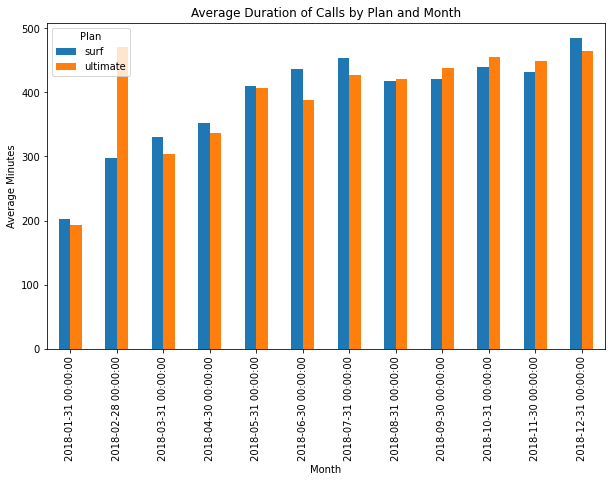

In [40]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
# Group by 'plan' and 'month', calculate average 
avg = df.groupby(['plan', 'date'])['num_minutes'].mean().reset_index()

# Pivot the DataFrame to have 'plan' as columns and 'month' as rows
pivot_table = avg.pivot(index='date', columns='plan', values='num_minutes')


# Plotting the bar plot
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Average Duration of Calls by Plan and Month')
plt.xlabel('Month')
plt.ylabel('Average Minutes')
plt.xticks(rotation=90)  # Rotate x-axis label
plt.legend(title='Plan')
plt.show()

#month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#plt.xticks(range(len(month_names)), month_names, rotation=0)  # Set custom tick labels

The bar graph above shows surf plan users tend to have a higher duration of phone calls until the middle of the year

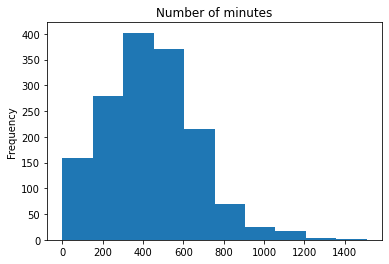

In [41]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
total_mins = df

surf_minutes = total_mins[total_mins['plan'] == 'surf']['num_minutes']
ultimate_minutes = total_mins[total_mins['plan'] == 'ultimate']['num_minutes']

surf_minutes.plot(kind='hist', bins=10, title='Number of minutes', ylabel='Frequency', xlabel='Minutes')

plt.show()


Throughout the year, most users require between 0-700 mins. The most frequent being between 200 and 600 mins. 

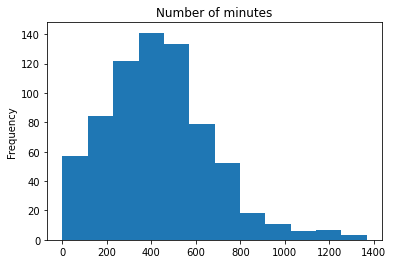

In [42]:
ultimate_minutes.plot(kind='hist', bins=12, title='Number of minutes', ylabel='Frequency')
plt.show()

Most users require around 400 minutes. We can see from the histogram, users of the ultimate plan do not tend to use over 800 mins. 

In [43]:
# Calculate the mean and the variance of the monthly call duration

monthly_stats = df.groupby('date')['num_minutes'].agg(['mean', 'var'])

# Print mean and variance of monthly call duration
print("Monthly Call Duration Mean and Variance:")
print(monthly_stats)

Monthly Call Duration Mean and Variance:
                  mean           var
date                                
2018-01-31  196.666667  13135.866667
2018-02-28  366.333333  56978.380952
2018-03-31  321.171429  43378.499160
2018-04-30  347.197183  45620.531992
2018-05-31  409.125000  52828.673544
2018-06-30  420.361702  42344.746809
2018-07-31  444.944134  63782.244052
2018-08-31  418.956522  52363.369280
2018-09-30  425.942238  48325.605347
2018-10-31  443.988131  50314.047478
2018-11-30  437.570720  52021.061529
2018-12-31  478.269565  60020.023037


<AxesSubplot:>

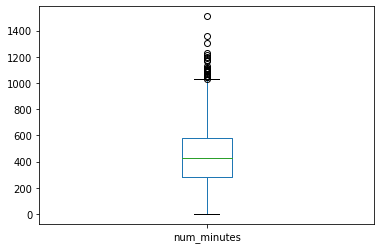

In [44]:
total_mins[total_mins['plan'] == 'surf']['num_minutes'].plot(kind='box')

<AxesSubplot:>

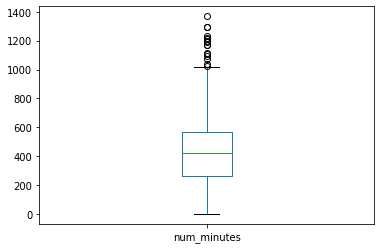

In [45]:
total_mins[total_mins['plan'] == 'ultimate']['num_minutes'].plot(kind='box')

In [46]:
#surf has a higher median of total mins

### Messages

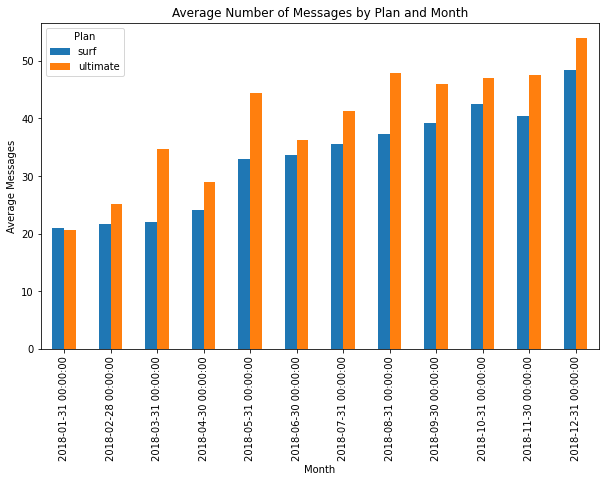

In [47]:
# Compare the number of messages users of each plan tend to send each month
msg_total = df.groupby(['plan', 'date'])['num_messages'].mean().reset_index()

# Pivot the DataFrame to have 'plan' as columns and 'month' as rows
pivot_table = msg_total.pivot(index='date', columns='plan', values='num_messages')


# Plotting the bar plot
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Average Number of Messages by Plan and Month')
plt.xlabel('Month')
plt.ylabel('Average Messages')
plt.xticks(rotation=90)  # Rotate x-axis label
plt.legend(title='Plan')
plt.show()

In [48]:
#Ultimate users message more than surf users

In [49]:
df.columns

Index(['user_id', 'date', 'monthly_calls', 'num_minutes', 'num_messages',
       'internet_usage', 'plan', 'result'],
      dtype='object')

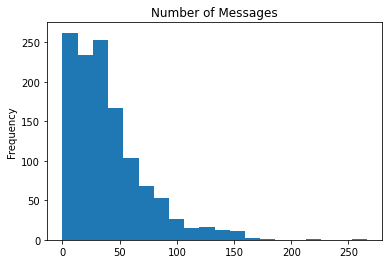

In [50]:
# Compare the number of messages users of each plan require each month. Plot a histogram.
total_mess = df

surf_mess = total_mess[total_mess['plan'] == 'surf']['num_messages']
ultimate_mess = total_mess[total_mess['plan'] == 'ultimate']['num_messages']

surf_mess.plot(kind='hist', bins=20, title='Number of Messages', ylabel='Frequency', xlabel='Messages')

plt.show()

Most users require up to 50 messages. Anything more, the frequency of user messages tend to decline

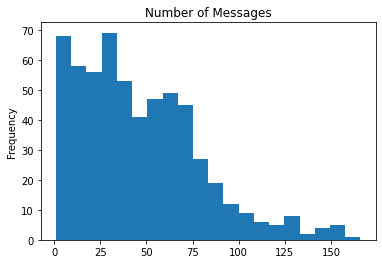

In [51]:
ultimate_mess.plot(kind='hist', bins=20, title='Number of Messages', ylabel='Frequency', xlabel='Messages')

plt.show()

After comparing the histograms to the bar graph, we can see the frequency of the outliers within the ultimate plan signifcantly
increase the average number of messages sent each month. Most users send up to 75 messages. After this number, the amount of 
people sending more messages decrease. 

### Internet

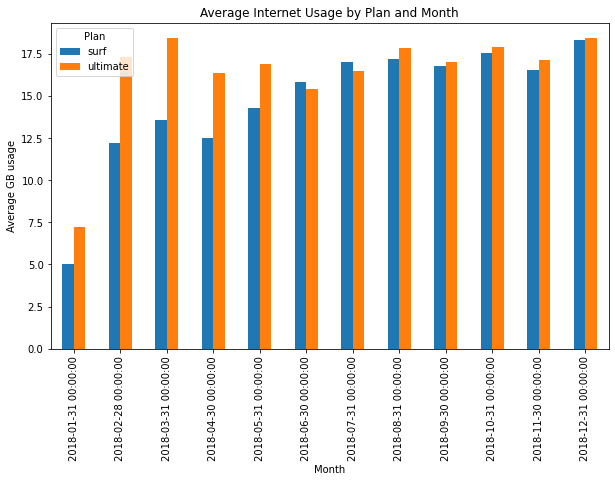

In [52]:
# Compare the number of messages users of each plan tend to send each month
internet_use = df.groupby(['plan', 'date'])['internet_usage'].mean().reset_index()

# Pivot the DataFrame to have 'plan' as columns and 'month' as rows
pivot_table = internet_use.pivot(index='date', columns='plan', values='internet_usage')


# Plotting the bar plot
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Average Internet Usage by Plan and Month')
plt.xlabel('Month')
plt.ylabel('Average GB usage')
plt.xticks(rotation=90)  # Rotate x-axis label
plt.legend(title='Plan')
plt.show()

In [53]:
#Ultimate users tend to use the internet more

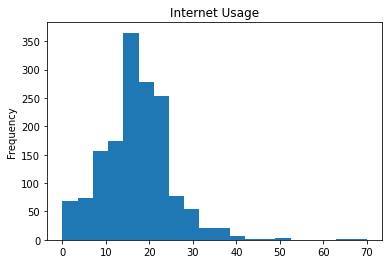

In [54]:
total_mess = df

surf_int = total_mess[total_mess['plan'] == 'surf']['internet_usage']
ultimate_int = total_mess[total_mess['plan'] == 'ultimate']['internet_usage']

surf_int.plot(kind='hist', bins=20, title='Internet Usage', ylabel='Frequency', xlabel='GB')

plt.show()

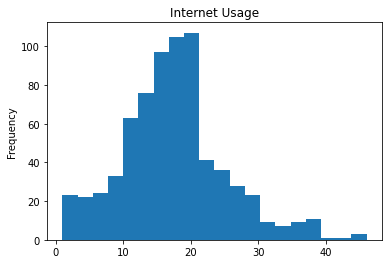

In [55]:
ultimate_int.plot(kind='hist', bins=20, title='Internet Usage', ylabel='Frequency', xlabel='GB')

plt.show()

Ultimate plan users tend to use the internet more

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

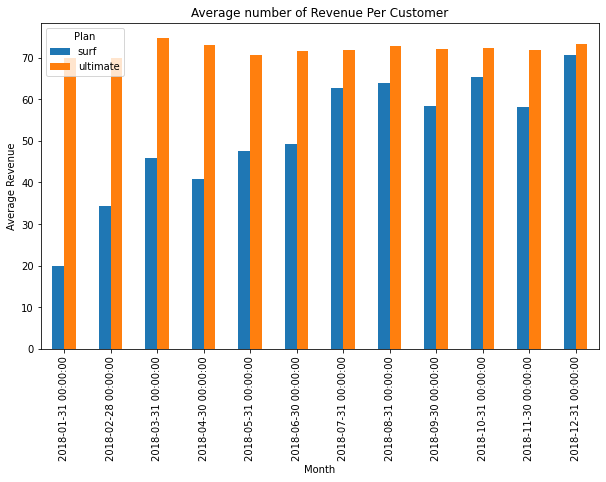

In [56]:
# Compare the number of messages users of each plan tend to send each month
results = df.groupby(['plan', 'date'])['result'].mean().reset_index()

# Pivot the DataFrame to have 'plan' as columns and 'month' as rows
pivot_table = results.pivot(index='date', columns='plan', values='result')


# Plotting the bar plot
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Average number of Revenue Per Customer')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(rotation=90)  # Rotate x-axis label
plt.legend(title='Plan')
plt.show()

In [57]:
#The ultimate plan generates more revenue. 

## Test statistical hypotheses

In [58]:
# Test the hypotheses
surf = df[df['plan'] == 'surf']
ultimate = df[df['plan'] == 'ultimate']

alpha = .05# your code: set a critical statistical significance level

results = st.stats.ttest_ind(surf['result'], ultimate['result'], equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    
#Null Hypothesis: revenue between both are the same
#Alternative Hypothesis: revenue between both are different

p-value: 3.17039054811355e-15
We reject the null hypothesis


/tmp/ipykernel_121/2203516059.py:7: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(surf['result'], ultimate['result'], equal_var = False)


In [59]:
# Test the hypotheses
#Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.
#Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.

# Use boolean indexing to filter rows containing the substring
filtered_df = users[users['city'].str.contains('NY-NJ')]
user_ids = filtered_df['user_id'].reset_index(drop=True) 
user_ids

users_in_NY_NJ = df[df['user_id'].isin(user_ids)]
users_not_in_NY_NJ = df[~df['user_id'].isin(user_ids)]

users_in_NY_NJ = users_in_NY_NJ['result']
users_not_in_NY_NJ = users_not_in_NY_NJ['result']

alpha = .05# your code: set a critical statistical significance level

results = st.stats.ttest_ind(users_in_NY_NJ, users_not_in_NY_NJ, equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    
#Null Hypothesis: revenue between both are the same
#Alternative Hypothesis: Revenue between both are different

p-value: 0.03352561588530057
We reject the null hypothesis


/tmp/ipykernel_121/2270125219.py:18: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(users_in_NY_NJ, users_not_in_NY_NJ, equal_var = False)


## General conclusion


After completing the study on revenue differences between the Ultimate and Surf plans, 
adding to the Ultimate's plan budget for advertisement would be a better decision due 
to its average revenue generated per customer. Both companies' revenue is very different
due to the difference in the base monthly fee. All previous images display differences 
between user calls, messages sent, internet, and revenue differences. Furthermore, rejecting 
the null hypothesis illustrated that revenue between both parties is different, and to maximize
profit, adding fundds towards Ultimate plan's budget for advertising would